# Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.datasets import fetch_california_housing,load_iris
from sklearn.preprocessing import MultiLabelBinarizer, PowerTransformer
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


# Preprocessing

dropping na values for imbd_score

In [4]:
df = df.dropna(subset=['imdb_score'])

Remove the in-between imdb_score of low and high

In [5]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

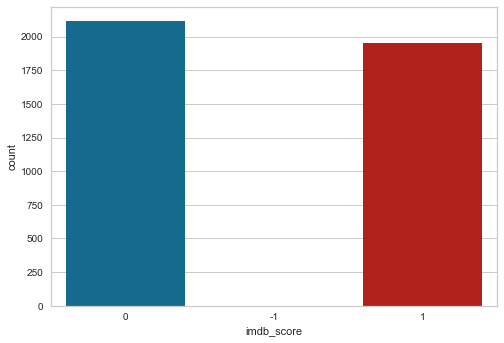

In [6]:
sns.countplot(x="imdb_score", data=df)

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

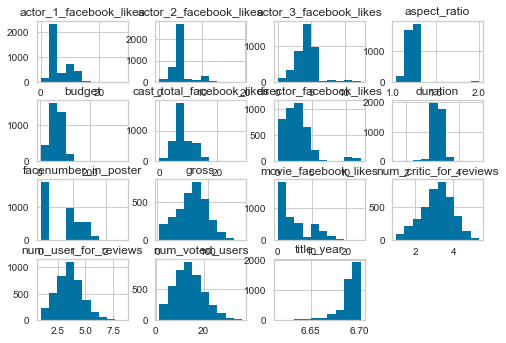

In [7]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [8]:
# mlb = MultiLabelBinarizer()
# df['genres'] =df['genres'].apply(lambda x: x.split('|'))
# df_genres = pd.DataFrame(mlb.fit_transform(df['genres']), columns="Genres_" + mlb.classes_, index=df.index)
# df = df.join(df_genres)
# df = df.drop(['genres'], axis=1)
# df

In [9]:
X = df.drop(['imdb_score'], axis=1)
y = df['imdb_score']

Train Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
3591,Rick Famuyiwa,18.00,106.00,44.00,328.00,Tamala Jones,865.00,"25,047,631.00",Comedy|Drama|Romance,Omar Epps,...,http://www.imdb.com/title/tt0161100/?ref_=fn_t...,50.00,English,USA,R,"6,000,000.00","1,999.00",405.00,1.85,990
4019,Uwe Boll,17.00,86.00,892.00,50.00,Shelly Varod,603.00,NaN,Action|Adventure|Fantasy|Thriller,Bashar Rahal,...,http://www.imdb.com/title/tt2379386/?ref_=fn_t...,10.00,English,Canada,R,"3,500,000.00","2,014.00",145.00,1.78,721
2712,Martin McDonagh,300.00,107.00,454.00,39.00,Anna Madeley,65.00,"7,757,130.00",Comedy|Crime|Drama,Elizabeth Berrington,...,http://www.imdb.com/title/tt0780536/?ref_=fn_t...,513.00,English,UK,R,"15,000,000.00","2,008.00",49.00,2.35,32000
1729,Frédéric Auburtin,7.00,110.00,18.00,432.00,Thomas Kretschmann,922.00,NaN,Drama|History|Sport,Fisher Stevens,...,http://www.imdb.com/title/tt2814362/?ref_=fn_t...,22.00,English,France,Not Rated,"24,000,000.00","2,014.00",919.00,2.35,0
4841,Babar Ahmed,8.00,90.00,0.00,32.00,Alexander Wraith,502.00,NaN,Action|Thriller,Lalaine,...,http://www.imdb.com/title/tt0421237/?ref_=fn_t...,18.00,English,USA,PG-13,"350,000.00","2,009.00",119.00,NaN,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,Jody Hill,190.00,86.00,62.00,59.00,Celia Weston,390.00,"23,993,605.00",Comedy|Crime|Drama,Collette Wolfe,...,http://www.imdb.com/title/tt1197628/?ref_=fn_t...,248.00,English,USA,R,"18,000,000.00","2,009.00",258.00,2.35,0
2154,Steven Spielberg,171.00,135.00,"14,000.00",252.00,Teri Garr,559.00,"128,300,000.00",Drama|Sci-Fi,Bob Balaban,...,http://www.imdb.com/title/tt0075860/?ref_=fn_t...,339.00,English,USA,PG,"19,400,870.00","1,977.00",481.00,2.35,0
1593,John McTiernan,104.00,135.00,323.00,495.00,Jeffrey Jones,826.00,"122,012,643.00",Action|Adventure|Thriller,Scott Glenn,...,http://www.imdb.com/title/tt0099810/?ref_=fn_t...,241.00,English,USA,PG,"30,000,000.00","1,990.00",692.00,2.35,0
3395,Fina Torres,72.00,92.00,26.00,417.00,John de Lancie,"1,000.00","5,018,450.00",Comedy|Fantasy|Romance,Harold Perrineau,...,http://www.imdb.com/title/tt0206420/?ref_=fn_t...,86.00,English,USA,R,"8,000,000.00","2,000.00",905.00,2.35,859


fill na values

In [11]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [12]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title",
           "language",
           "plot_keywords",
           "country",
           "genres",
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [13]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

3591         R
4019         R
2712         R
1729    others
4841     PG-13
         ...  
2423         R
2154        PG
1593        PG
3395         R
3646         R
Name: content_rating, Length: 3253, dtype: object

In [14]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others
3591,18.00,106.00,44.00,328.00,865.00,"25,047,631.00",6585,2724,0.00,50.00,"6,000,000.00","1,999.00",405.00,1.85,990,0,0,1,0
4019,17.00,86.00,892.00,50.00,603.00,"24,840,500.00",1285,854,1.00,10.00,"3,500,000.00","2,014.00",145.00,1.78,721,0,0,1,0
2712,300.00,107.00,454.00,39.00,65.00,"7,757,130.00",307639,173,1.00,513.00,"15,000,000.00","2,008.00",49.00,2.35,32000,0,0,1,0
1729,7.00,110.00,18.00,432.00,922.00,"24,840,500.00",3279,2725,4.00,22.00,"24,000,000.00","2,014.00",919.00,2.35,0,0,0,0,1
4841,8.00,90.00,0.00,32.00,502.00,"24,840,500.00",476,689,0.00,18.00,"350,000.00","2,009.00",119.00,2.35,53,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,190.00,86.00,62.00,59.00,390.00,"23,993,605.00",52467,727,1.00,248.00,"18,000,000.00","2,009.00",258.00,2.35,0,0,0,1,0
2154,171.00,135.00,"14,000.00",252.00,559.00,"128,300,000.00",139288,1591,0.00,339.00,"19,400,870.00","1,977.00",481.00,2.35,0,1,0,0,0
1593,104.00,135.00,323.00,495.00,826.00,"122,012,643.00",143696,2575,1.00,241.00,"30,000,000.00","1,990.00",692.00,2.35,0,1,0,0,0
3395,72.00,92.00,26.00,417.00,"1,000.00","5,018,450.00",8546,2687,0.00,86.00,"8,000,000.00","2,000.00",905.00,2.35,859,0,0,1,0


Correlation

<AxesSubplot:>

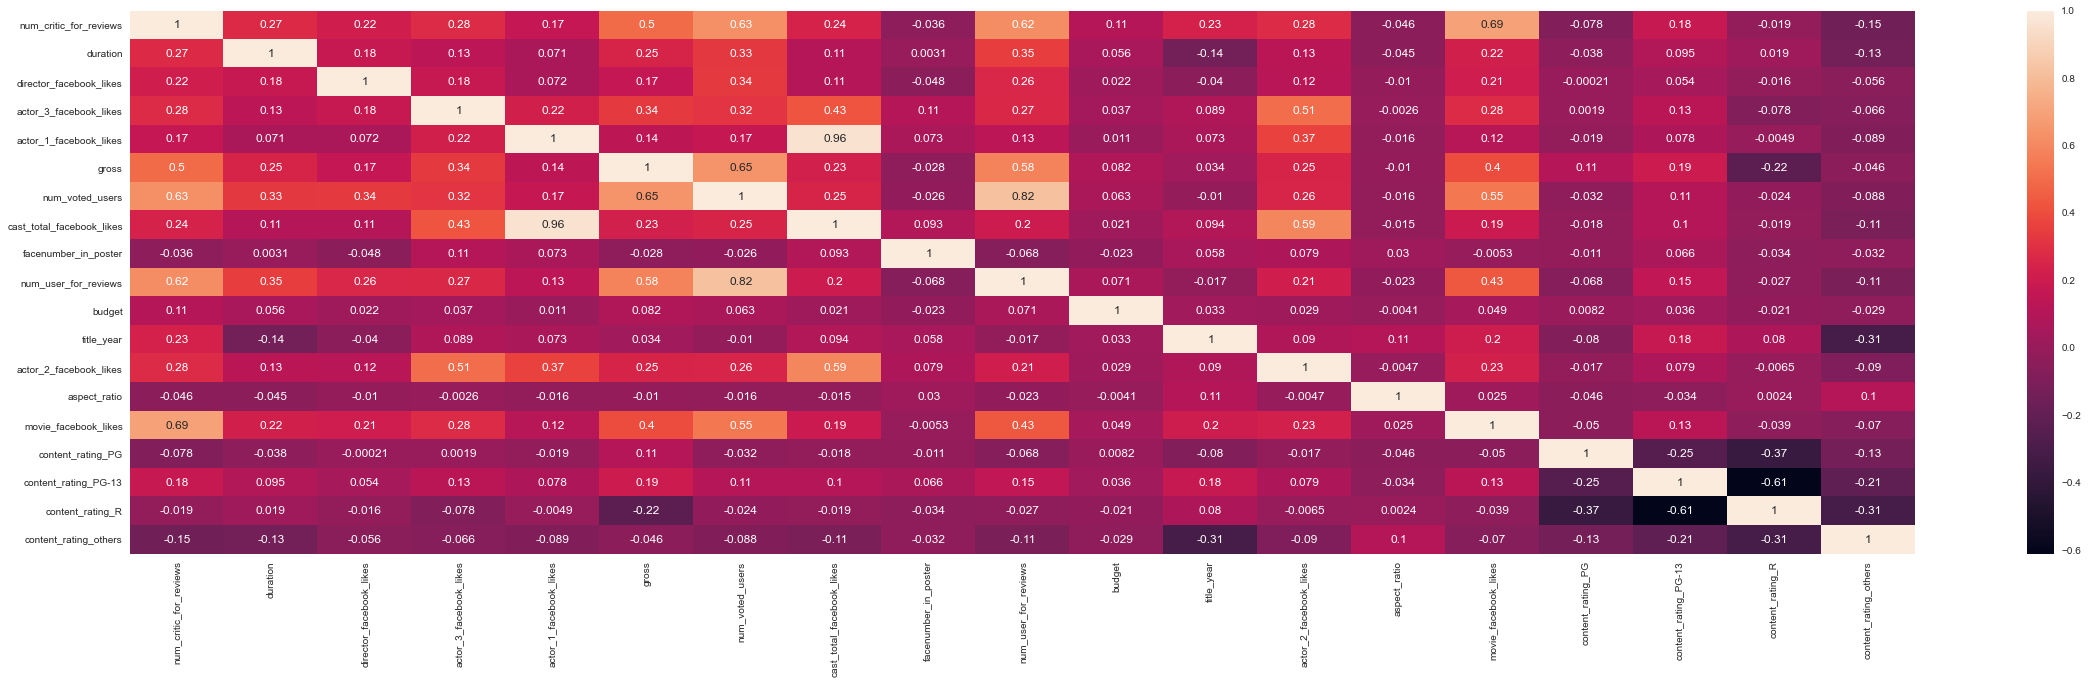

In [15]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y_train
sns.heatmap(heatmap.corr(), annot=True)

# Model

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.30      0.40       427
           1       0.51      0.80      0.62       387

    accuracy                           0.54       814
   macro avg       0.57      0.55      0.51       814
weighted avg       0.57      0.54      0.51       814

Accuracy on test:  0.5368550368550369


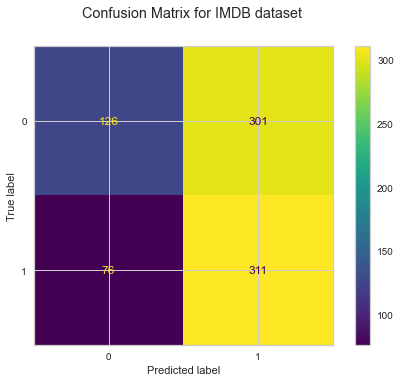

In [20]:
clf=MLPClassifier(hidden_layer_sizes=(100,50,25), activation="relu" ,solver='adam',random_state=1, max_iter=2000)
clf.fit(X_train,y_train)
y_train_pred=pd.DataFrame(clf.predict(X_train))
y_test_pred=pd.DataFrame(clf.predict(X_test))
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
fig=metrics.plot_confusion_matrix(clf, X_test, y_test)
print("Accuracy on test: ", metrics.accuracy_score(y_test, y_test_pred))
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()

In [17]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-8-1))

mae : 0.4631449631449631
mse : 0.4631449631449631
mape : 1665335980145601.0
r2 : -0.8570641879829832
Adjusted r2 : -0.875519484261075


In [18]:
print("Train accuracy: ",clf.score(X_train,y_train))
print("Test accuracy: ",clf.score(X_test,y_test))

Train accuracy:  0.5597909621887488
Test accuracy:  0.5368550368550369


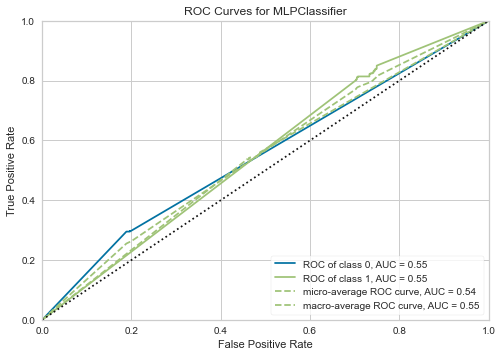

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
visualizer = ROCAUC(clf, classes=[0,1])
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test.astype(int))        
visualizer.show()  